# State Drug Utilization Notebook

## Load Dependencies

In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# for visualizations
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

## Load the data

You can access the data from the Medicaid.gov website:
https://www.medicaid.gov/medicaid/prescription-drugs/state-drug-utilization-data/index.html

For this I used the State_Drug_Utilization_Data_2017:
https://data.medicaid.gov/State-Drug-Utilization/State-Drug-Utilization-Data-2017/3v5r-x5x9

For the 2008 - 2018 comparison I used the following datasets:
https://data.medicaid.gov/State-Drug-Utilization/State-Drug-Utilization-Data-2018/e5ds-i36p
https://data.medicaid.gov/State-Drug-Utilization/State-Drug-Utilization-Data-2008/ny8j-2ymd
    
For FAQs about this datasets:
https://www.medicaid.gov/medicaid/prescription-drugs/state-drug-utilization-data/state-drug-utilization-data-faq/index.html

In [4]:
PATH = "Utilization/"
df_data = pd.read_csv(PATH+'State_Drug_Utilization_Data_2017.csv',low_memory=False)
df_data.head()

,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Suppression Used,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date,Latitude,Longitude,Location,NDC
0,MCOU,PA,55150,239,30,2017,1,Dexamethas,False,33.0,19.0,234.98,234.98,0.0,1/1,01/01/2017 12:00:00 AM,40.5773,-77.2640,"(40.5773, -77.264)",55150023930
1,FFSU,WV,173,712,15,2017,1,AVODART 0.,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,38.4680,-80.9696,"(38.468, -80.9696)",00173071215
2,MCOU,OH,37205,473,69,2017,1,NASAL DECO,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,40.3736,-82.7755,"(40.3736, -82.7755)",37205047369
3,MCOU,HI,378,9102,93,2017,1,NITROGLYCE,True,NaN,NaN,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,21.1098,-157.5311,"(21.1098, -157.5311)",00378910293
4,MCOU,NY,904,2013,60,2017,4,ASPIRIN 5G,False,6874.0,199.0,134.98,134.98,0.0,10/1,10/01/2017 12:00:00 AM,42.1497,-74.9384,"(42.1497, -74.9384)",00904201360


In [5]:
df_data.shape

(4725199, 20)

In [6]:
df_data.columns

Index(['Utilization Type', 'State', 'Labeler Code', 'Product Code',
       'Package Size', 'Year', 'Quarter', 'Product Name', 'Suppression Used',
       'Units Reimbursed', 'Number of Prescriptions',
       'Total Amount Reimbursed', 'Medicaid Amount Reimbursed',
       'Non Medicaid Amount Reimbursed', 'Quarter Begin', 'Quarter Begin Date',
       'Latitude', 'Longitude', 'Location', 'NDC'],
      dtype='object')

In [7]:
df_data.rename(columns={'Utilization Type':'Utilization_Type','State':'State','Labeler Code':'Labeler_Code','Product Code':'Product_Code',
                        'Package Size':'Package_Size','Year':'Year','Quarter':'Quarter','Product Name':'Product_Name','Suppression Used':'Suppression_Used',
                        'Units Reimbursed':'Units_Reimbursed','Number of Prescriptions':'Number_of_Prescriptions','Total Amount Reimbursed':'Total_Amount_Reimbursed',
                        'Medicaid Amount Reimbursed':'Medicaid_Amount_Reimbursed','Non Medicaid Amount Reimbursed':'Non_Medicaid_Amount_Reimbursed',
                        'Quarter Begin':'Quarter_Begin','Quarter Begin Date':'Quarter_Begin_Date','Latitude':'Latitude','Longitude':'Longitude','Location':'Location','NDC':'NDC'}, inplace=True)

In [8]:
df_data.columns

Index(['Utilization_Type', 'State', 'Labeler_Code', 'Product_Code',
       'Package_Size', 'Year', 'Quarter', 'Product_Name', 'Suppression_Used',
       'Units_Reimbursed', 'Number_of_Prescriptions',
       'Total_Amount_Reimbursed', 'Medicaid_Amount_Reimbursed',
       'Non_Medicaid_Amount_Reimbursed', 'Quarter_Begin', 'Quarter_Begin_Date',
       'Latitude', 'Longitude', 'Location', 'NDC'],
      dtype='object')

In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4725199 entries, 0 to 4725198
Data columns (total 20 columns):
Utilization_Type                  object
State                             object
Labeler_Code                      int64
Product_Code                      int64
Package_Size                      object
Year                              int64
Quarter                           int64
Product_Name                      object
Suppression_Used                  bool
Units_Reimbursed                  float64
Number_of_Prescriptions           float64
Total_Amount_Reimbursed           float64
Medicaid_Amount_Reimbursed        float64
Non_Medicaid_Amount_Reimbursed    float64
Quarter_Begin                     object
Quarter_Begin_Date                object
Latitude                          float64
Longitude                         float64
Location                          object
NDC                               object
dtypes: bool(1), float64(7), int64(4), object(8)
memory usage: 689

In [10]:
df_data.count()

Utilization_Type                  4725199
State                             4725199
Labeler_Code                      4725199
Product_Code                      4725199
Package_Size                      4725199
Year                              4725199
Quarter                           4725199
Product_Name                      4725081
Suppression_Used                  4725199
Units_Reimbursed                  2277486
Number_of_Prescriptions           2277486
Total_Amount_Reimbursed           2277486
Medicaid_Amount_Reimbursed        2277486
Non_Medicaid_Amount_Reimbursed    2277486
Quarter_Begin                     4725199
Quarter_Begin_Date                4725199
Latitude                          4455636
Longitude                         4455636
Location                          4455636
NDC                               4725199
dtype: int64

## Reviewing Memory

Reference:
https://www.kaggle.com/jagangupta/memory-optimization-and-eda-on-entire-dataset

In [11]:
# Review current usage, df_data.info() already stated 689.5+ MB in use.  This may not be a huge issue now but when merging
#different files this may be an issue
print(df_data.memory_usage(index=True))
mem_test=df_data.memory_usage(index=True).sum()

Index                                   80
Utilization_Type                  37801592
State                             37801592
Labeler_Code                      37801592
Product_Code                      37801592
Package_Size                      37801592
Year                              37801592
Quarter                           37801592
Product_Name                      37801592
Suppression_Used                   4725199
Units_Reimbursed                  37801592
Number_of_Prescriptions           37801592
Total_Amount_Reimbursed           37801592
Medicaid_Amount_Reimbursed        37801592
Non_Medicaid_Amount_Reimbursed    37801592
Quarter_Begin                     37801592
Quarter_Begin_Date                37801592
Latitude                          37801592
Longitude                         37801592
Location                          37801592
NDC                               37801592
dtype: int64


In [12]:
#Change all int and float 64s to int and float 32s.
df_data['Labeler_Code'] = df_data['Labeler_Code'].astype(np.int32)
df_data['Product_code'] = df_data['Product_Code'].astype(np.int32)
df_data['Year'] = df_data['Year'].astype(np.int32)
df_data['Quarter'] = df_data['Quarter'].astype(np.int32)
df_data['Units_Reimbursed'] = df_data['Units_Reimbursed'].astype(np.float32)
df_data['Number_of_Prescriptions'] = df_data['Number_of_Prescriptions'].astype(np.float32)
df_data['Total_Amount_Reimbursed'] = df_data['Total_Amount_Reimbursed'].astype(np.float32)
df_data['Medicaid_Amount_Reimbursed'] = df_data['Medicaid_Amount_Reimbursed'].astype(np.float32)
df_data['Non_Medicaid_Amount_Reimbursed'] = df_data['Non_Medicaid_Amount_Reimbursed'].astype(np.float32)
df_data['Latitude'] = df_data['Latitude'].astype(np.float16)
df_data['Longitude'] = df_data['Longitude'].astype(np.float16)
#check memory
print(df_data.memory_usage(index=True))
new_mem_test=df_data.memory_usage(index=True).sum()
print("Dataset uses ",new_mem_test/ 1024**2," MB after changes")
print("Memory saved =",(mem_test-new_mem_test)/ 1024**2," MB")

Index                                   80
Utilization_Type                  37801592
State                             37801592
Labeler_Code                      18900796
Product_Code                      37801592
Package_Size                      37801592
Year                              18900796
Quarter                           18900796
Product_Name                      37801592
Suppression_Used                   4725199
Units_Reimbursed                  18900796
Number_of_Prescriptions           18900796
Total_Amount_Reimbursed           18900796
Medicaid_Amount_Reimbursed        18900796
Non_Medicaid_Amount_Reimbursed    18900796
Quarter_Begin                     37801592
Quarter_Begin_Date                37801592
Latitude                           9450398
Longitude                          9450398
Location                          37801592
NDC                               37801592
Product_code                      18900796
dtype: int64
Dataset uses  509.21208095550537  MB afte

In [13]:
df_data.describe(include='all')

,Utilization_Type,State,Labeler_Code,Product_Code,Package_Size,Year,Quarter,Product_Name,Suppression_Used,Units_Reimbursed,...,Total_Amount_Reimbursed,Medicaid_Amount_Reimbursed,Non_Medicaid_Amount_Reimbursed,Quarter_Begin,Quarter_Begin_Date,Latitude,Longitude,Location,NDC,Product_code
count,4725199,4725199,4.725199e+06,4.725199e+06,4725199,4725199.0,4.725199e+06,4725081,4725199,2.277486e+06,...,2.277486e+06,2.277486e+06,2.277486e+06,4725199,4725199,4.455636e+06,4.455636e+06,4455636,4725199,4.725199e+06
unique,2,52,NaN,NaN,101,NaN,NaN,14005,2,NaN,...,NaN,NaN,NaN,4,4,NaN,NaN,51,42657,NaN
top,FFSU,XX,NaN,NaN,01,NaN,NaN,LISINOPRIL,True,NaN,...,NaN,NaN,NaN,4/1,04/01/2017 12:00:00 AM,NaN,NaN,"(36.17, -119.7462)",00169633910,NaN
freq,2379898,269563,NaN,NaN,1107372,NaN,NaN,48169,2447713,NaN,...,NaN,NaN,NaN,1189679,1189679,NaN,NaN,183397,364,NaN
mean,NaN,NaN,3.145329e+04,1.592924e+03,NaN,2017.0,2.494373e+00,NaN,NaN,4.121791e+04,...,5.686014e+04,5.366487e+04,3.195281e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.592924e+03
std,NaN,NaN,2.850110e+04,2.264813e+03,NaN,0.0,1.118117e+00,NaN,NaN,9.527282e+05,...,9.821914e+05,9.644354e+05,7.116120e+04,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,2.264813e+03
min,NaN,NaN,2.000000e+00,0.000000e+00,NaN,2017.0,1.000000e+00,NaN,NaN,1.000000e-03,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,2.110938e+01,-1.575000e+02,NaN,NaN,0.000000e+00
25%,NaN,NaN,4.720000e+02,1.990000e+02,NaN,2017.0,1.000000e+00,NaN,NaN,9.840000e+02,...,4.988900e+02,4.676000e+02,0.000000e+00,NaN,NaN,3.575000e+01,-9.831250e+01,NaN,NaN,1.990000e+02
50%,NaN,NaN,3.172200e+04,5.410000e+02,NaN,2017.0,2.000000e+00,NaN,NaN,2.865000e+03,...,1.819070e+03,1.715700e+03,0.000000e+00,NaN,NaN,3.934375e+01,-8.675000e+01,NaN,NaN,5.410000e+02
75%,NaN,NaN,6.050500e+04,1.966000e+03,NaN,2017.0,3.000000e+00,NaN,NaN,1.096900e+04,...,8.378065e+03,7.862140e+03,5.100000e+01,NaN,NaN,4.215625e+01,-7.818750e+01,NaN,NaN,1.966000e+03


In [14]:
df_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Utilization_Type,4725199,2,FFSU,2379898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,4725199,52,XX,269563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Labeler_Code,4.7252e+06,NaN,NaN,NaN,31453.3,28501.1,2,472,31722,60505,99207
Product_Code,4.7252e+06,NaN,NaN,NaN,1592.92,2264.81,0,199,541,1966,9999
Package_Size,4725199,101,01,1107372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,4.7252e+06,NaN,NaN,NaN,2017,0,2017,2017,2017,2017,2017
Quarter,4.7252e+06,NaN,NaN,NaN,2.49437,1.11812,1,1,2,3,4
Product_Name,4725081,14005,LISINOPRIL,48169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Suppression_Used,4725199,2,True,2447713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Units_Reimbursed,2.27749e+06,NaN,NaN,NaN,41217.9,952728,0.001,984,2865,10969,5.95335e+08


In [15]:
#Sort all entries where the State is 'XX'
df_data.loc[df_data['State'].isin(['XX'])]

,Utilization_Type,State,Labeler_Code,Product_Code,Package_Size,Year,Quarter,Product_Name,Suppression_Used,Units_Reimbursed,...,Total_Amount_Reimbursed,Medicaid_Amount_Reimbursed,Non_Medicaid_Amount_Reimbursed,Quarter_Begin,Quarter_Begin_Date,Latitude,Longitude,Location,NDC,Product_code
50,FFSU,XX,904,6575,61,2017,1,PHENOBARBI,False,1.576000e+03,...,7.006600e+02,6.923600e+02,8.300000,1/1,01/01/2017 12:00:00 AM,NaN,NaN,NaN,00904657561,6575
56,MCOU,XX,60505,2741,01,2017,4,VERAPAMIL,True,NaN,...,NaN,NaN,NaN,10/1,10/01/2017 12:00:00 AM,NaN,NaN,NaN,60505274101,2741
88,FFSU,XX,18860,105,01,2017,1,FAZACLO 15,False,4.206000e+03,...,9.302968e+04,9.299668e+04,33.000000,1/1,01/01/2017 12:00:00 AM,NaN,NaN,NaN,18860010501,105
96,FFSU,XX,59762,6720,01,2017,1,AMLODIPINE,True,NaN,...,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,NaN,NaN,NaN,59762672001,6720
103,FFSU,XX,29300,155,01,2017,1,ALFUZOSIN,True,NaN,...,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,NaN,NaN,NaN,29300015501,155
122,FFSU,XX,603,6349,28,2017,1,VALSARTAN/,True,NaN,...,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,NaN,NaN,NaN,00603634928,6349
146,FFSU,XX,25021,779,01,2017,1,GRANISETRO,False,5.196000e+02,...,1.386750e+03,1.322400e+03,64.349998,1/1,01/01/2017 12:00:00 AM,NaN,NaN,NaN,25021077901,779
204,FFSU,XX,24385,471,65,2017,1,LORATADINE,False,1.044000e+03,...,1.981000e+02,1.791000e+02,19.000000,1/1,01/01/2017 12:00:00 AM,NaN,NaN,NaN,24385047165,471
239,FFSU,XX,115,1911,01,2017,1,RIMANTADIN,False,4.160000e+02,...,1.025690e+03,1.021690e+03,4.000000,1/1,01/01/2017 12:00:00 AM,NaN,NaN,NaN,00115191101,1911
294,MCOU,XX,603,5192,21,2017,1,PHENTERMIN,True,NaN,...,NaN,NaN,NaN,1/1,01/01/2017 12:00:00 AM,NaN,NaN,NaN,00603519221,5192


In [16]:
df_data['State'].str.contains('XX').value_counts()[True]

269563

In [27]:
#Remove all rows where State is 'XX'
df_new = df_data[~df_data['State'].str.contains('XX')]

In [29]:
#Only looking at all Hydrocodone entries and save into new file
df_new.loc[df_new['Product_Name'].isin(['HYDROCODON'])].sort_values(by='State').to_csv('Utilization/State_2008_med.csv', index=False)

In [30]:
#Load new file
df_new = pd.read_csv('Utilization/State_2008_med.csv', low_memory=False)

## Visualization

In [33]:
#Load values
units = df_new['Units_Reimbursed'].values

Basemap:

Issues with installing Basemap https://stackoverflow.com/questions/34979424/importing-mpl-toolkits-basemap-on-windows

Download the shape files from here:

.shx
https://github.com/matplotlib/basemap/blob/master/examples/st99_d00.shx

.shp
https://github.com/matplotlib/basemap/blob/master/examples/st99_d00.shp

.dbf
https://github.com/matplotlib/basemap/blob/master/examples/st99_d00.dbf

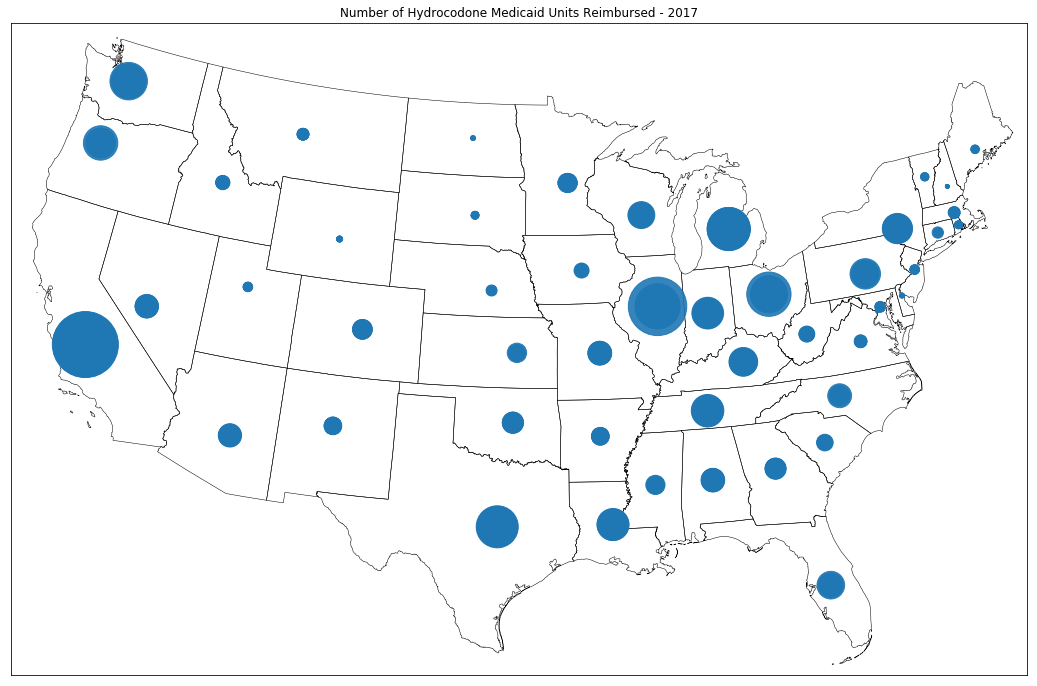

In [38]:
#US outline
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
#Size of the image
plt.figure(figsize=(20, 12))
#Load the shape files
shp_info = m.readshapefile('Utilization/Shape/st99_d00','states',drawbounds=True)
#x,y denote to the Longitude and Latitude values from the data set
x,y = m(df_new['Longitude'].values, df_new['Latitude'].values)
#Plot x,y, units (Units Reimbursed)
plt.scatter(x, y,
            units/1000, 
            cmap='Blues',alpha=0.9, zorder=10)
plt.title('Number of Hydrocodone Medicaid Units Reimbursed - 2017')
#Save image
plt.savefig('2017_units', dpi=350)